In [1]:
import numpy as np
import pandas as pd
import time
import pydicom
import os
import matplotlib.pyplot as plt
import seaborn as sns
from FuncDistancePorosity import calc_porosity
import cv2

# 空隙率の比較

In [2]:
result_00_raw = calc_porosity(condition='FirstStorage',storage_period='00')
result_00 = result_00_raw.drop('distance (μm)',axis=1)

result_02_raw = calc_porosity(condition='FirstStorage',storage_period='02')
result_02 = result_02_raw.drop('distance (μm)',axis=1)

result_04_raw = calc_porosity(condition='FirstStorage',storage_period='02')
result_04 = result_04_raw.drop('distance (μm)',axis=1)

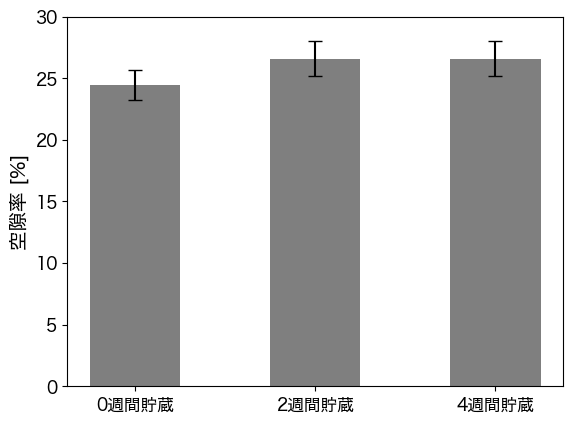

In [3]:
temp = [result_00.iloc[100:450,:].mean().mean(),result_02.iloc[100:450,:].mean().mean(),result_04.iloc[100:450,:].mean().mean()]
temp2 = [result_00.iloc[100:450,:].mean().std(),result_02.iloc[100:450,:].mean().std(),result_04.iloc[100:450,:].mean().std()]


fig = plt.figure()
plt.bar(['0週間貯蔵','2週間貯蔵','4週間貯蔵'],temp
        ,yerr = temp2, capsize=5,color='k',alpha=0.5
        ,width=0.5)
plt.ylim(0,30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('空隙率 [%]',fontsize=14)

plt.show()
fig.savefig('./../output/図_Jona_空隙率比較.png',dpi=400)

# 空孔分布比較

## 貯蔵期間ごとに平均化

In [4]:
# パラメータ
BINS = 30
LABEL = 'Vol. (pixels?)'
VOXEL = 10

all_storage_void_df = pd.DataFrame()

for i_storage in ['00','02','04']:
    each_storage_void_df = pd.DataFrame()
    
    for j_sample in range(1,6):
        i_path = f'./../data/data_FirstStorage/data_microstructure/void_distribution/Results_{i_storage}{j_sample}.csv'
        
        # 各サンプルの結合
        df_temp = pd.read_csv(i_path,index_col=0,encoding='Shift-JIS')
        kde_x = sns.kdeplot(np.log10(df_temp[LABEL]*(VOXEL**3)+1e-5)).get_lines()[0].get_data()[0]
        kde_y = sns.kdeplot(np.log10(df_temp[LABEL]*(VOXEL**3)+1e-5)).get_lines()[0].get_data()[1]
        # hist_temp = plt.hist(np.log10(df_temp['Vol. (pixels?)']*(10**9)+0.0001),bins=BINS)[0] # 各区間ごとの頻度を算出
        plt.clf()
        each_storage_void_df = pd.concat([each_storage_void_df, pd.DataFrame(kde_y)],axis=1)
        
    # columnsにする
    each_storage_void_df.columns = [f'{i_storage}_{j}' for j in range(1,6)]
    each_storage_void_df.index = kde_x
    
    # 全サンプル用に結合
    all_storage_void_df = pd.concat([all_storage_void_df, each_storage_void_df],axis=1)
    
    # 平均および標準偏差サンプルを作成
    # week{storage}_mean,std_dfに格納
    if i_storage == '00':
        week0_mean_df = each_storage_void_df.mean(axis=1)
        week0_std_df = each_storage_void_df.std(axis=1)
    elif i_storage == '02':
        week2_mean_df = each_storage_void_df.mean(axis=1)
        week2_std_df = each_storage_void_df.std(axis=1)
    else:
        week4_mean_df = each_storage_void_df.mean(axis=1)
        week4_std_df = each_storage_void_df.std(axis=1)


<Figure size 640x480 with 0 Axes>

## 平均の比較

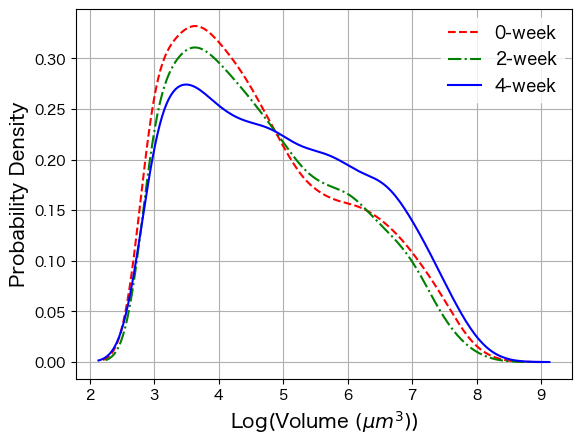

In [5]:
ALPHA=0.07

fig,ax = plt.subplots()
ax.plot(week0_mean_df.index,week0_mean_df.values,label='0-week',color='r',linestyle='dashed')
# ax.fill_between(week0_std_df.index,week0_mean_df-week0_std_df,week0_mean_df+week0_std_df,color='r',alpha=ALPHA)

# ax1 = ax.twinx()
ax.plot(week2_mean_df.index,week2_mean_df.values,label='2-week',color='g',linestyle='-.')
# ax.fill_between(week2_std_df.index,week2_mean_df-week2_std_df,week2_mean_df+week2_std_df,color='g',alpha=ALPHA)

# ax2 = ax.twinx()
ax.plot(week4_mean_df.index,week4_mean_df.values,label='4-week',color='b')
# ax.fill_between(week4_std_df.index,week4_mean_df-week4_std_df,week4_mean_df+week4_std_df,color='b',alpha=ALPHA)

ax.legend()
ax.set_xlabel('Log(Volume $(μm^3)$)',fontsize=14)
ax.set_ylabel('Probability Density',fontsize=14)
ax.legend(loc='upper right',edgecolor='w',fontsize=12).get_frame().set_linewidth(1)
plt.grid()
plt.show()

fig.savefig('./../output/図_空孔分布比較_平均値void_porosity_mean.png',dpi=400)

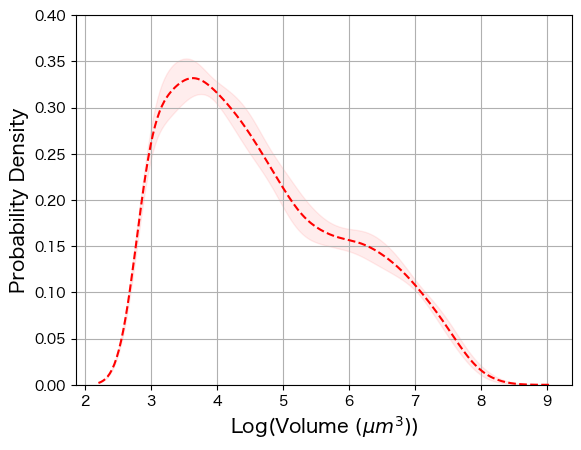

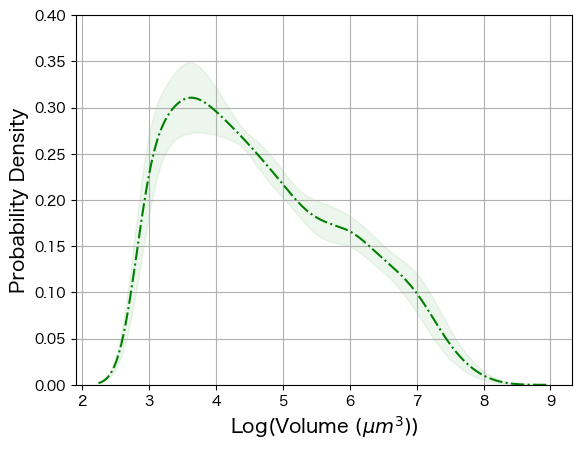

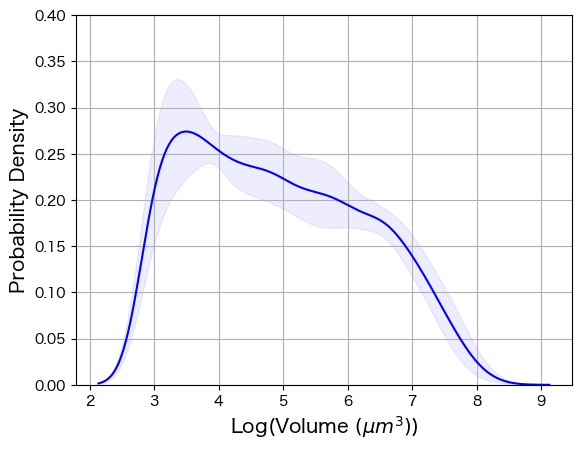

In [6]:
fig,ax = plt.subplots()
ax.plot(week0_mean_df.index,week0_mean_df.values,label='0-week',color='r',linestyle='dashed')
ax.fill_between(week0_std_df.index,week0_mean_df-week0_std_df,week0_mean_df+week0_std_df,color='r',alpha=ALPHA)
ax.set_xlabel('Log(Volume $(μm^3)$)',fontsize=14)
ax.set_ylabel('Probability Density',fontsize=14)
plt.ylim(0,0.4)
plt.grid()
fig.savefig('./../output/図_空孔分布_0week.png',dpi=400)
plt.show()

fig,ax = plt.subplots()
ax.plot(week2_mean_df.index,week2_mean_df.values,label='2-week',color='g',linestyle='-.')
ax.fill_between(week2_std_df.index,week2_mean_df-week2_std_df,week2_mean_df+week2_std_df,color='g',alpha=ALPHA)
ax.set_xlabel('Log(Volume $(μm^3)$)',fontsize=14)
ax.set_ylabel('Probability Density',fontsize=14)
plt.ylim(0,0.4)
fig.savefig('./../output/図_空孔分布_2week.png',dpi=400)
plt.grid()
plt.show()

fig,ax = plt.subplots()
ax.plot(week4_mean_df.index,week4_mean_df.values,label='4-week',color='b')
ax.fill_between(week4_std_df.index,week4_mean_df-week4_std_df,week4_mean_df+week4_std_df,color='b',alpha=ALPHA)
ax.set_xlabel('Log(Volume $(μm^3)$)',fontsize=14)
ax.set_ylabel('Probability Density',fontsize=14)
plt.ylim(0,0.4)
fig.savefig('./../output/図_空孔分布_0week.png',dpi=400)
plt.grid()
plt.show()


## 空隙率の算出

## 平均空隙体積を算出

In [8]:
# パラメータ
BINS = 30
LABEL = 'Vol. (pixels?)'
VOXEL = 10
i_storage = "00"

pore_list = []
for j in range(1,6):
    i_path = f'./../data/data_FirstStorage/data_microstructure/void_distribution/Results_{i_storage}{j}.csv'
    df_temp = pd.read_csv(i_path,index_col=0,encoding='Shift-JIS')
    temp = (df_temp['Vol. (pixels?)']*(VOXEL**3)).mean()
    pore_list.append(temp)

print(pore_list)
print(np.mean(pore_list))


# 0week
# [1397580.3317535545, 1493190.8899420747, 1832163.346613546, 1692840.8351409978, 2134725.8123402703]
# 1710100 ± 260853 μm3

# 2week
# [2425406.1577393506, 3506853.1431590067, 1272079.2316926771, 1803538.7971330632, 1996647.000983284]
# 2200905 ± 750765 μm3

# 4week
# [2463297.9390681004, 2648844.3708609273, 1270911.1747851004, 2442144.5676274947, 3273817.7000529943]
# 2419803 ± 648713 μm3

[1397580.3317535545, 1493190.8899420747, 1832163.346613546, 1692840.8351409978, 2134725.8123402703]
1710100.2431580885
